# Predicting Job Changes in the Data Science Realm

This project explores the prediction of job changes in the field of data science, using human resource analysis and predictive analytics. It emphasizes the importance of understanding the factors that influence scientists' decisions about job change data and provides insight into the complex patterns behind these changes. 

#### Methodology
The methodology includes description of the dataset, context and content, data preparation and visualization, and the application of machine learning models such as logistic regression, decision trees and random forest. Through various analytical techniques, the influence of various factors on individuals' decision to change jobs is investigated.

#### Results
The results indicate a high efficiency of the models, especially random forest, in predicting the candidate's intention to change jobs. Metrics such as accuracy, precision, sensitivity and F1-score were evaluated to assess the predictive ability of the model.

In summary, work provides valuable insights into the complex patterns of job turnover among data scientists and integrates HR analytics and predictive analytics to support organizations in attracting and retaining top talent in this dynamic field.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# First CSV file
df1 = pd.read_csv('train.csv')

# Second CSV file
df2 = pd.read_csv('test.csv')

# Merged files
df_combined = pd.concat([df1, df2], ignore_index=True)

# Saving the merged dataframe in a new CSV file
df_combined.to_csv('merged_files.csv', index=False)


In [2]:
# Print the first few lines
df_combined.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
# Check for missing values
print(df_combined.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64


In [4]:
df_combined['gender'].fillna(df_combined['gender'].value_counts().idxmax(), inplace=True)
df_combined['enrolled_university'].fillna('Unknown', inplace=True)
df_combined['education_level'].fillna(df_combined['education_level'].mode()[0], inplace=True)
df_combined['major_discipline'].fillna('Unknown', inplace=True)
df_combined['experience'].fillna(df_combined['experience'].mode()[0], inplace=True)
df_combined['company_size'].fillna('Unknown', inplace=True)
df_combined['company_type'].fillna('Unknown', inplace=True)
df_combined['last_new_job'].fillna('Unknown', inplace=True)
df_combined['target'].fillna(df_combined['target'].mode()[0], inplace=True)

In [5]:
# Check for missing values
print(df_combined.isnull().sum())

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [6]:
# List of columns we want to delete
columns_to_delete = ['enrollee_id', 'city', 'target', 'gender']

# Deleting columns
df_combined = df_combined.drop(columns=columns_to_delete)

In [7]:
# Print the results
print(df_combined)

       city_development_index      relevent_experience enrolled_university  \
0                       0.920  Has relevent experience       no_enrollment   
1                       0.776   No relevent experience       no_enrollment   
2                       0.624   No relevent experience    Full time course   
3                       0.789   No relevent experience             Unknown   
4                       0.767  Has relevent experience       no_enrollment   
...                       ...                      ...                 ...   
21282                   0.920   No relevent experience       no_enrollment   
21283                   0.897  Has relevent experience       no_enrollment   
21284                   0.887   No relevent experience       no_enrollment   
21285                   0.804  Has relevent experience    Full time course   
21286                   0.804  Has relevent experience       no_enrollment   

      education_level major_discipline experience company_size 

In [8]:
# Checking how many rows have the value 'never' in the column 'last_new_job'
count_never = df_combined['last_new_job'].value_counts().get('never', 0)

# Print the result
print(f"Number of rows with value 'never': {count_never}")

Number of rows with value 'never': 2710


In [9]:
# Filter the DataFrame to throw out rows where 'last_new_job' equals 'never'
df_filtered = df_combined[df_combined['last_new_job'] != 'never']

# Print the result
print(df_filtered)

       city_development_index      relevent_experience enrolled_university  \
0                       0.920  Has relevent experience       no_enrollment   
1                       0.776   No relevent experience       no_enrollment   
4                       0.767  Has relevent experience       no_enrollment   
5                       0.764  Has relevent experience    Part time course   
6                       0.920  Has relevent experience       no_enrollment   
...                       ...                      ...                 ...   
21279                   0.878   No relevent experience       no_enrollment   
21282                   0.920   No relevent experience       no_enrollment   
21283                   0.897  Has relevent experience       no_enrollment   
21285                   0.804  Has relevent experience    Full time course   
21286                   0.804  Has relevent experience       no_enrollment   

      education_level major_discipline experience company_size 

In [10]:
# Selection of categorical columns
categorical_columns = ['relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']

# Application of One-Hot Encoding
data_encoded = pd.get_dummies(df_combined, columns=categorical_columns)

# Print the results
print(data_encoded)

       city_development_index experience company_size last_new_job  \
0                       0.920        >20      Unknown            1   
1                       0.776         15        50-99           >4   
2                       0.624          5      Unknown        never   
3                       0.789         <1      Unknown        never   
4                       0.767        >20        50-99            4   
...                       ...        ...          ...          ...   
21282                   0.920         16      Unknown            4   
21283                   0.897         18      Unknown            2   
21284                   0.887          3      Unknown        never   
21285                   0.804          7      100-500            1   
21286                   0.804         15       10000+            2   

       training_hours  relevent_experience_Has relevent experience  \
0                  36                                         True   
1                  

In [11]:
# Replace character strings with the middle value of the range
data_encoded['company_size'] = data_encoded['company_size'].replace('<10', '0-10')
# Split the range of values into two columns
data_encoded[['min_size', 'max_size']] = data_encoded['company_size'].str.split('-', expand=True)
# Convert new columns to numeric format
data_encoded[['min_size', 'max_size']] = data_encoded[['min_size', 'max_size']].apply(pd.to_numeric, errors='coerce')
# Calculate the mean of 'company_size'
data_encoded['company_size'] = data_encoded[['min_size', 'max_size']].mean(axis=1)


In [12]:
# Delete the 'min_size' and 'max_size' columns as they were temporary anyway
data_encoded = data_encoded.drop(['min_size', 'max_size'], axis=1)

In [13]:
# Conversion of the 'experience' column
data_encoded['experience'] = pd.to_numeric(data_encoded['experience'], errors='coerce')

# Convert the 'company_size' column
# Filling missing values with the mean value
mean_company_size = data_encoded['company_size'].mean()
data_encoded['company_size'].fillna(mean_company_size, inplace=True)

# Conversion of 'last_new_job' column
# Replace 'never' with 0, '>4' with 5, replace others with numeric values
data_encoded['last_new_job'] = data_encoded['last_new_job'].replace({'never': 0, '>4': 5, '1': 1, '2': 2, '3': 3, '4': 4})
data_encoded['last_new_job'] = pd.to_numeric(data_encoded['last_new_job'], errors='coerce')

In [14]:
print(data_encoded.describe())

       city_development_index    experience  company_size  last_new_job  \
count            21287.000000  16952.000000  21287.000000  20824.000000   
mean                 0.828462      8.096744   1013.701696      2.001825   
std                  0.123537      4.931430   1343.086523      1.673256   
min                  0.448000      1.000000      5.000000      0.000000   
25%                  0.739000      4.000000    300.000000      1.000000   
50%                  0.903000      7.000000   1013.701696      1.000000   
75%                  0.920000     11.000000   1013.701696      3.000000   
max                  0.949000     20.000000   7499.500000      5.000000   

       training_hours  
count    21287.000000  
mean        65.328510  
std         60.075201  
min          1.000000  
25%         23.000000  
50%         47.000000  
75%         88.000000  
max        336.000000  


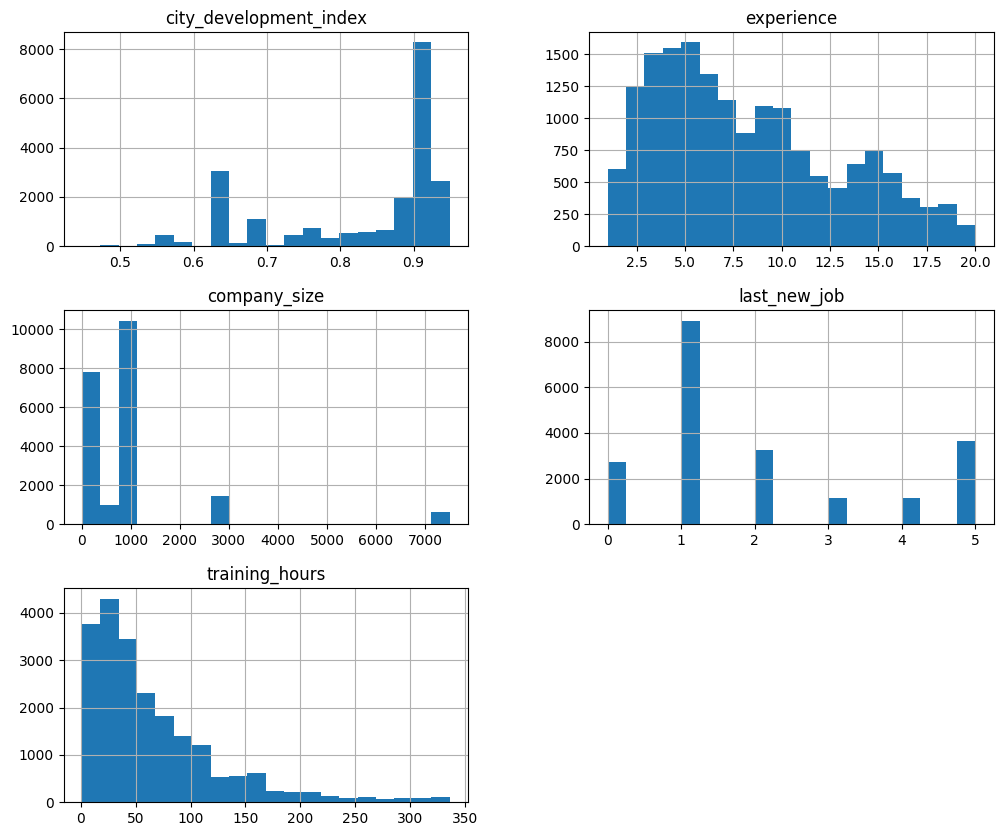

In [15]:
data_encoded.hist(figsize=(12, 10), bins=20)
plt.show()

In [16]:
df_combined.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unknown,Unknown,1,36
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,Unknown,Unknown,never,83
3,0.789,No relevent experience,Unknown,Graduate,Business Degree,<1,Unknown,Pvt Ltd,never,52
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [17]:
data_encoded = pd.DataFrame(df_combined)

# Creating the target variable
data_encoded['target_variable'] = data_encoded['last_new_job'].apply(lambda x: 1 if x in ['never', '1'] else 0)

# Print the results
print(data_encoded[['last_new_job', 'target_variable']])

      last_new_job  target_variable
0                1                1
1               >4                0
2            never                1
3            never                1
4                4                0
...            ...              ...
21282            4                0
21283            2                0
21284        never                1
21285            1                1
21286            2                0

[21287 rows x 2 columns]


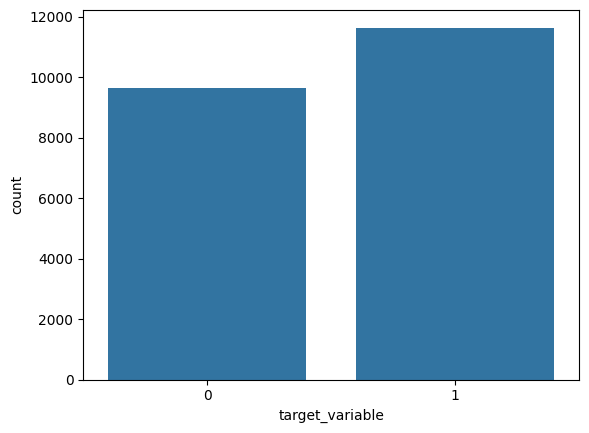

In [18]:
sns.countplot(x='target_variable', data=data_encoded)
plt.show()

In [19]:
# Data without target variable
X = data_encoded.drop('target_variable', axis=1)

# Target variable
y = data_encoded['target_variable']

# Splitting data into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the sizes of the obtained sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (17029, 10)
Testing set size: (4258, 10)


In [20]:
data_encoded['experience'] = pd.to_numeric(data_encoded['experience'], errors='coerce')
data_encoded['last_new_job'] = pd.to_numeric(data_encoded['last_new_job'], errors='coerce')

In [21]:
print(data_encoded.head())

   city_development_index      relevent_experience enrolled_university  \
0                   0.920  Has relevent experience       no_enrollment   
1                   0.776   No relevent experience       no_enrollment   
2                   0.624   No relevent experience    Full time course   
3                   0.789   No relevent experience             Unknown   
4                   0.767  Has relevent experience       no_enrollment   

  education_level major_discipline  experience company_size    company_type  \
0        Graduate             STEM         NaN      Unknown         Unknown   
1        Graduate             STEM        15.0        50-99         Pvt Ltd   
2        Graduate             STEM         5.0      Unknown         Unknown   
3        Graduate  Business Degree         NaN      Unknown         Pvt Ltd   
4         Masters             STEM         NaN        50-99  Funded Startup   

   last_new_job  training_hours  target_variable  
0           1.0              

In [22]:
# Selection of remaining categorical columns
categorical_columns = ['relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

# Application of One-Hot Encoding
data_encoded = pd.get_dummies(data_encoded, columns=categorical_columns)

# Print the results
print(data_encoded)

       city_development_index  experience  last_new_job  training_hours  \
0                       0.920         NaN           1.0              36   
1                       0.776        15.0           NaN              47   
2                       0.624         5.0           NaN              83   
3                       0.789         NaN           NaN              52   
4                       0.767         NaN           4.0               8   
...                       ...         ...           ...             ...   
21282                   0.920        16.0           4.0              15   
21283                   0.897        18.0           2.0              30   
21284                   0.887         3.0           NaN              18   
21285                   0.804         7.0           1.0              84   
21286                   0.804        15.0           2.0              11   

       target_variable  relevent_experience_Has relevent experience  \
0                    1      

In [23]:
from sklearn.model_selection import train_test_split

# Data without target variable
X = data_encoded.drop('target_variable', axis=1)

# Target variable
y = data_encoded['target_variable']

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show pool sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (17029, 38)
Test set size: (4258, 38)


## LOGISTIC REGRESSION

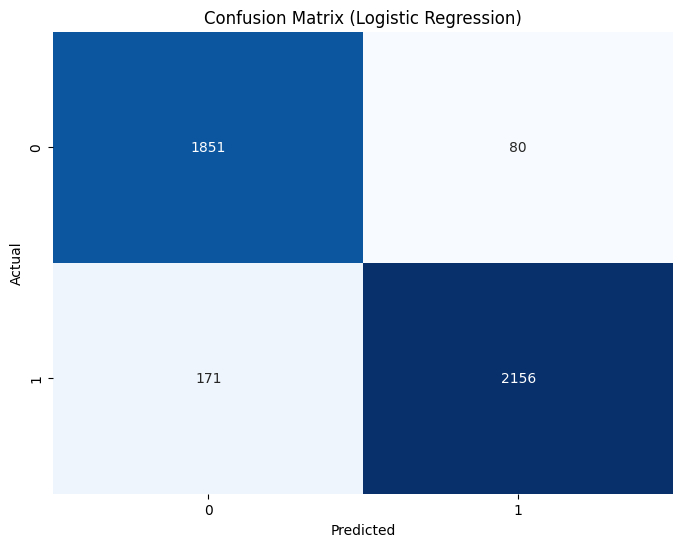

Accuracy: 0.9410521371535933
Confusion Matrix:
[[1851   80]
 [ 171 2156]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1931
           1       0.96      0.93      0.94      2327

    accuracy                           0.94      4258
   macro avg       0.94      0.94      0.94      4258
weighted avg       0.94      0.94      0.94      4258



In [24]:
from sklearn.impute import SimpleImputer

# Filling in missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Creating a LogisticRegression object with solver='lbfgs' added
logreg_model = LogisticRegression(random_state=42, max_iter=2000, solver='sag')

# Training the model on the training data
logreg_model.fit(X_train_imputed, y_train)

# Predicting the target variable on the test set
y_pred = logreg_model.predict(X_test_imputed)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Printing the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

## DECISION TREE

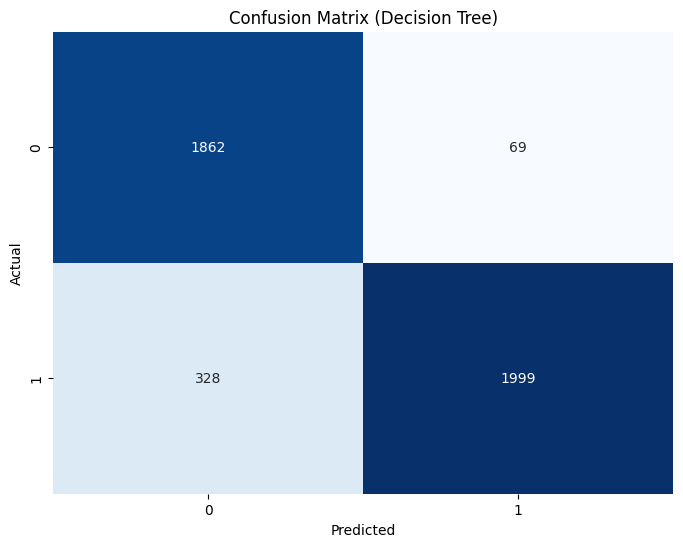

Accuracy (Decision Tree): 0.906763738844528
Confusion Matrix (Decision Tree):
 [[1862   69]
 [ 328 1999]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1931
           1       0.97      0.86      0.91      2327

    accuracy                           0.91      4258
   macro avg       0.91      0.91      0.91      4258
weighted avg       0.91      0.91      0.91      4258



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)

# Predicting the target variable on the test set
y_pred_dt = dt_model.predict(X_test)

# Model evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Print the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the results
print("Accuracy (Decision Tree):", accuracy_dt)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_dt)
print("Classification Report (Decision Tree):\n", class_report_dt)


In [26]:
from sklearn.impute import SimpleImputer

# Creating an imputer
imputer = SimpleImputer(strategy='mean')  

# Apply imputation to the training and test set
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

## RANDOM FOREST

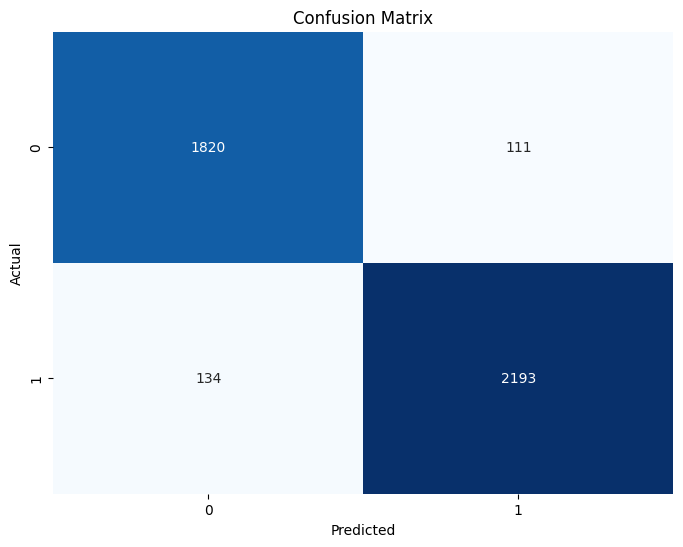

Accuracy: 0.9424612494128699
Confusion Matrix:
 [[1820  111]
 [ 134 2193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1931
           1       0.95      0.94      0.95      2327

    accuracy                           0.94      4258
   macro avg       0.94      0.94      0.94      4258
weighted avg       0.94      0.94      0.94      4258



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Training the model at the training session
rf_model.fit(X_train_imputed, y_train)

# Predicting the target variable on the test set
y_pred_rf = rf_model.predict(X_test_imputed)

# Model evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the results
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Classification Report:\n", classification_report_rf)


Feature city_development_index: 0.04784158463656589
Feature experience: 0.08560454761990346
Feature last_new_job: 0.6667473210196584
Feature training_hours: 0.06460063418711297
Feature relevent_experience_Has relevent experience: 0.01266968731438012
Feature relevent_experience_No relevent experience: 0.010953780919584445
Feature enrolled_university_Full time course: 0.010888013990768492
Feature enrolled_university_Part time course: 0.002511161078236219
Feature enrolled_university_Unknown: 0.001708759286712314
Feature enrolled_university_no_enrollment: 0.007276577990118035
Feature education_level_Graduate: 0.0046726916725739545
Feature education_level_High School: 0.004931904922584301
Feature education_level_Masters: 0.004179827226354716
Feature education_level_Phd: 0.0018194869518116034
Feature education_level_Primary School: 0.001837711643040016
Feature major_discipline_Arts: 0.0007484834528914989
Feature major_discipline_Business Degree: 0.001121572866075004
Feature major_discipline_

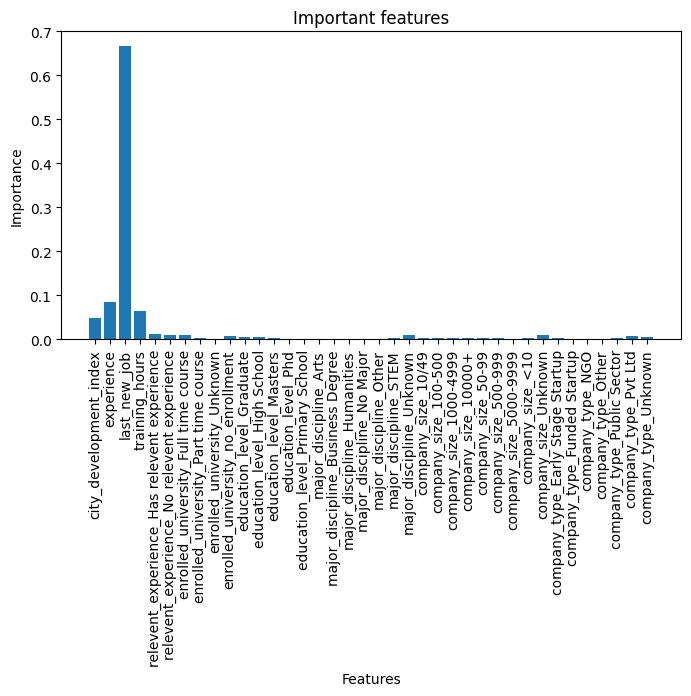

In [28]:
# Convert NumPy arrays to DataFrame
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Accessing feature importance
feature_importance_rf = rf_model.feature_importances_

# Print feature importance
for i, importance in enumerate(feature_importance_rf):
    print(f"Feature {X_train_imputed_df.columns[i]}: {importance}")

# Visualization of feature importance
plt.figure(figsize=(8, 4))
plt.bar(range(len(feature_importance_rf)), feature_importance_rf, align='center')
plt.xticks(range(len(feature_importance_rf)), X_train_imputed_df.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Important features')
plt.show()

Feature city_development_index: 0.04784158463656589
Feature experience: 0.08560454761990346
Feature last_new_job: 0.6667473210196584
Feature training_hours: 0.06460063418711297


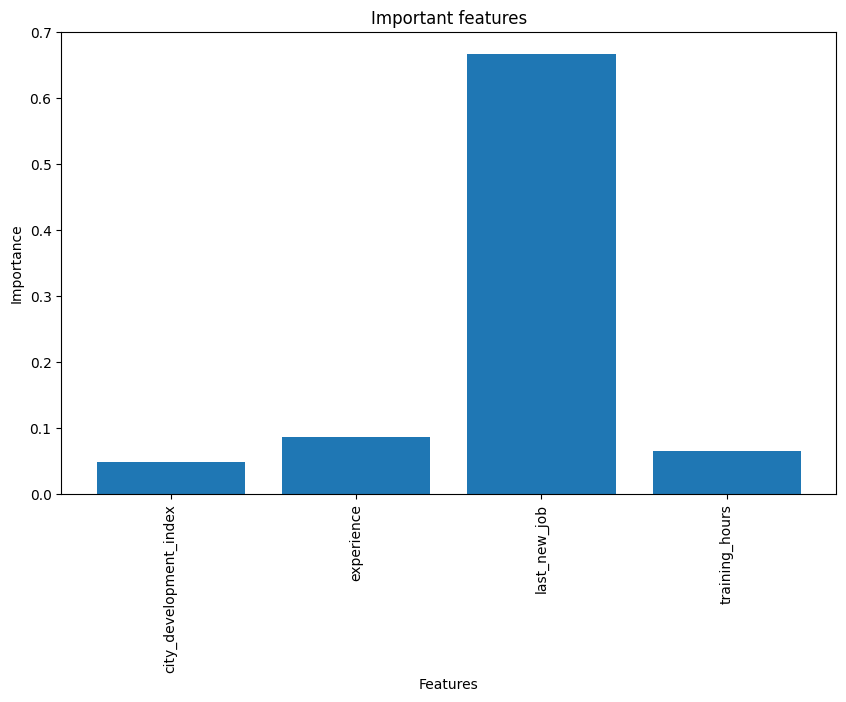

In [29]:
# Convert NumPy arrays to DataFrame
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Selecting only certain features
selected_features = ['city_development_index', 'experience', 'last_new_job', 'training_hours']
X_train_selected = X_train_imputed_df[selected_features]

# Accessing feature importance
feature_importance_rf = rf_model.feature_importances_

# Print feature importance
for i, importance in enumerate(feature_importance_rf):
    if i < len(selected_features):
        print(f"Feature {selected_features[i]}: {importance}")

# Visualization of feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importance_rf[:len(selected_features)], align='center')
plt.xticks(range(len(selected_features)), selected_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Important features')
plt.show()

In [30]:
df_combined.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unknown,Unknown,1,36
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,Unknown,Unknown,never,83
3,0.789,No relevent experience,Unknown,Graduate,Business Degree,<1,Unknown,Pvt Ltd,never,52
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [31]:
from scipy.stats import chi2_contingency

# Selection of categorical columns
categorical_columns = ['relevent_experience_Has relevent experience',
                       'relevent_experience_No relevent experience',
                       'enrolled_university_Full time course',
                       'enrolled_university_Part time course',
                       'enrolled_university_Unknown',
                       'education_level_Graduate', 'education_level_High School',
                       'education_level_Masters', 'education_level_Phd',
                       'education_level_Primary School', 'major_discipline_Arts',
                       'major_discipline_Business Degree',
                       'major_discipline_Humanities', 'major_discipline_No Major',
                       'major_discipline_Other', 'major_discipline_STEM',
                       'major_discipline_Unknown', 'company_size_10/49',
                       'company_size_100-500', 'company_size_1000-4999',
                       'company_size_10000+', 'company_size_50-99',
                       'company_size_500-999', 'company_size_5000-9999',
                       'company_size_<10', 'company_size_Unknown',
                       'company_type_Early Stage Startup',
                       'company_type_Funded Startup', 'company_type_NGO',
                       'company_type_Other', 'company_type_Public Sector',
                       'company_type_Pvt Ltd', 'company_type_Unknown']

# Showing the significance of each categorical variable relative to the target variable
for column in categorical_columns:
    contingency_table = pd.crosstab(data_encoded[column], data_encoded['target_variable'])
    stat, p, _, _ = chi2_contingency(contingency_table)
    
    if p < 0.05:
        print(f"Variable {column} is significant relative to the target variable (p-value: {p:.4f})")
    else:
        print(f"Variable {column} is not significant relative to the target variable (p-value: {p:.4f})")


Variable relevent_experience_Has relevent experience is significant relative to the target variable (p-value: 0.0000)
Variable relevent_experience_No relevent experience is significant relative to the target variable (p-value: 0.0000)
Variable enrolled_university_Full time course is significant relative to the target variable (p-value: 0.0000)
Variable enrolled_university_Part time course is not significant relative to the target variable (p-value: 0.1120)
Variable enrolled_university_Unknown is significant relative to the target variable (p-value: 0.0000)
Variable education_level_Graduate is significant relative to the target variable (p-value: 0.0362)
Variable education_level_High School is significant relative to the target variable (p-value: 0.0000)
Variable education_level_Masters is significant relative to the target variable (p-value: 0.0000)
Variable education_level_Phd is significant relative to the target variable (p-value: 0.0000)
Variable education_level_Primary School is s

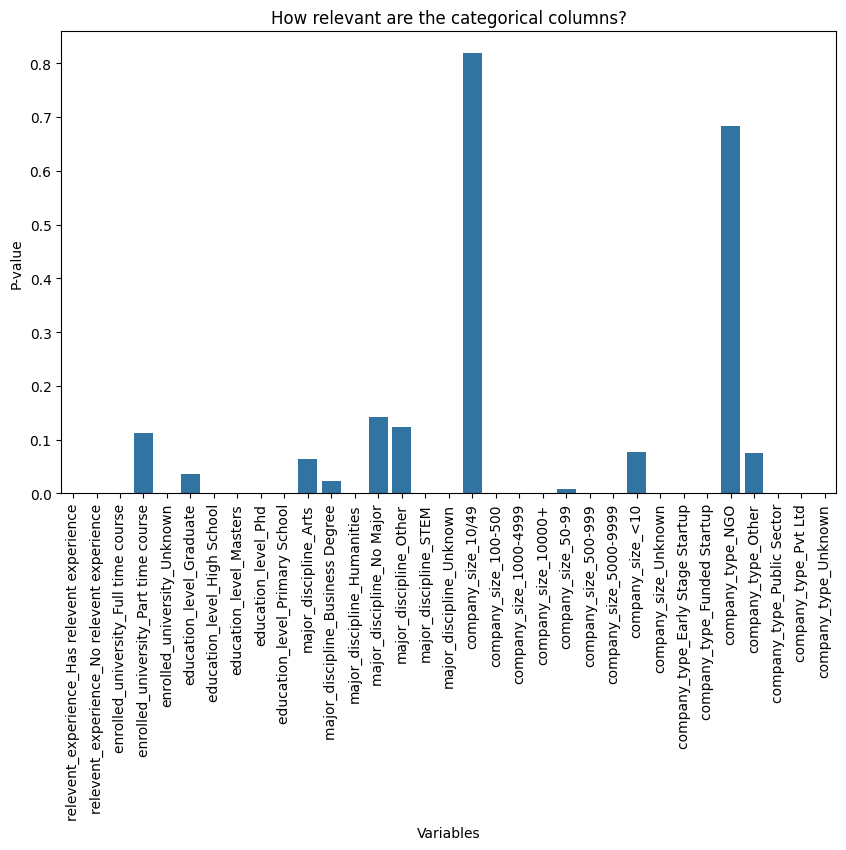

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables that are significant
significant_variables = [
    'relevent_experience_Has relevent experience',
    'relevent_experience_No relevent experience',
    'enrolled_university_Full time course',
    'enrolled_university_Part time course',
    'enrolled_university_Unknown',
    'education_level_Graduate', 'education_level_High School',
    'education_level_Masters', 'education_level_Phd',
    'education_level_Primary School', 'major_discipline_Arts',
    'major_discipline_Business Degree',
    'major_discipline_Humanities', 'major_discipline_No Major',
    'major_discipline_Other', 'major_discipline_STEM',
    'major_discipline_Unknown', 'company_size_10/49',
    'company_size_100-500', 'company_size_1000-4999',
    'company_size_10000+', 'company_size_50-99',
    'company_size_500-999', 'company_size_5000-9999',
    'company_size_<10', 'company_size_Unknown',
    'company_type_Early Stage Startup',
    'company_type_Funded Startup', 'company_type_NGO',
    'company_type_Other', 'company_type_Public Sector',
    'company_type_Pvt Ltd', 'company_type_Unknown'
]

# Extracting significant variables
significant_variables_p_values = {
    'relevent_experience_Has relevent experience': 0.0000,
    'relevent_experience_No relevent experience': 0.0000,
    'enrolled_university_Full time course': 0.0000,
    'enrolled_university_Part time course': 0.1120,
    'enrolled_university_Unknown': 0.0000,
    'education_level_Graduate': 0.0362,
    'education_level_High School': 0.0000,
    'education_level_Masters': 0.0000,
    'education_level_Phd': 0.0000,
    'education_level_Primary School': 0.0000,
    'major_discipline_Arts': 0.0638,
    'major_discipline_Business Degree': 0.0228,
    'major_discipline_Humanities': 0.0006,
    'major_discipline_No Major': 0.1412,
    'major_discipline_Other': 0.1232,
    'major_discipline_STEM': 0.0000,
    'major_discipline_Unknown': 0.0000,
    'company_size_10/49': 0.8184,
    'company_size_100-500': 0.0000,
    'company_size_1000-4999': 0.0000,
    'company_size_10000+': 0.0000,
    'company_size_50-99': 0.0085,
    'company_size_500-999': 0.0000,
    'company_size_5000-9999': 0.0000,
    'company_size_<10': 0.0772,
    'company_size_Unknown': 0.0000,
    'company_type_Early Stage Startup': 0.0000,
    'company_type_Funded Startup': 0.0000,
    'company_type_NGO': 0.6838,
    'company_type_Other': 0.0750,
    'company_type_Public Sector': 0.0000,
    'company_type_Pvt Ltd': 0.0000,
    'company_type_Unknown': 0.0000
}

# Graph display
plt.figure(figsize=(10, 6))
sns.barplot(x=list(significant_variables_p_values.keys()), y=list(significant_variables_p_values.values()))
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('P-value')
plt.title('How relevant are the categorical columns?')
plt.show()
